In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV file:-

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#show the number of cells in the dataframe
print("video games dataframe size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of games: ", len(df))

video games dataframe size:  182578
number of games:  16598


In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

1. Calculate the total global sales for each Platform.

In [ ]:
total_global_sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()
total_global_sales_by_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

2. Find the top-selling genre based on global sales



In [ ]:
top_selling_genre = df.groupby('Genre')['Global_Sales'].sum().idxmax()
top_selling_genre

'Action'

#3. Create a bar chart to visualize the sum of `Global_Sales` per `Genre`.

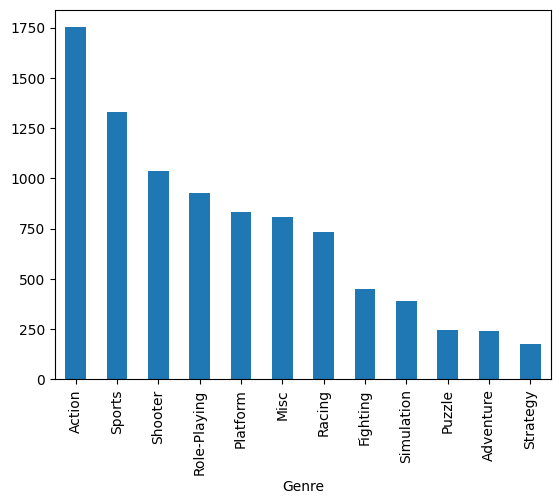

In [ ]:
global_sales_chart = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

# 4. Calculate the average global sales for each Publisher

In [ ]:
avg_sales_per_publisher = df.groupby('Publisher')['Global_Sales'].mean().reset_index()
avg_sales_per_publisher

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111
...,...,...
573,id Software,0.030000
574,imageepoch Inc.,0.020000
575,inXile Entertainment,0.100000
576,"mixi, Inc",0.860000


# 5. Calculate the total EU_Sales for each platform-year combination.

In [ ]:
platform_year_eu_sales = df.groupby(['Platform','Year'])['EU_Sales'].sum()
platform_year_eu_sales

Platform  Year  
2600      1980.0     0.67
          1981.0     1.96
          1982.0     1.65
          1983.0     0.34
          1984.0     0.01
                    ...  
XB        2008.0     0.04
XOne      2013.0     5.29
          2014.0    17.75
          2015.0    17.98
          2016.0     4.63
Name: EU_Sales, Length: 241, dtype: float64

# 6. Find the number of publishers in each Platform.¶

In [ ]:
no_publisher_per_platform = df.groupby('Platform')['Publisher'].apply(lambda x: x.count()).reset_index(name='Publisher_Count')
no_publisher_per_platform

,Platform,Publisher_Count
0,2600,133
1,3DO,3
2,3DS,507
3,DC,52
4,DS,2156
5,GB,98
6,GBA,796
7,GC,556
8,GEN,27
9,GG,1


# 7. Find the publisher with the most occurences for each Platform.

In [ ]:
platform_publisher_count = df.groupby(['Platform','Publisher']).size()

In [ ]:
most_frequent_publisher_platform = platform_publisher_count.groupby('Platform').apply(lambda x: x.index[x == x.max()].min()[1]).reset_index(name='Publisher')
most_frequent_publisher_platform

,Platform,Publisher
0,2600,Atari
1,3DO,Imageworks
2,3DS,Namco Bandai Games
3,DC,Sega
4,DS,Ubisoft
5,GB,Nintendo
6,GBA,THQ
7,GC,Electronic Arts
8,GEN,Sega
9,GG,Sega


# 8. Find the publisher with the highest total global sales for each Year.

In [ ]:
yearly_publisher_sales = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum()


In [ ]:
top_publisher_year = yearly_publisher_sales.groupby('Year').idxmax().apply(lambda x: x[1]).reset_index(name='Top_Selling_Publisher')


In [ ]:
top_publisher_year['Global_Sales_Sum'] = top_publisher_year.apply(lambda row: yearly_publisher_sales.loc[row['Year'], row['Top_Selling_Publisher']], axis=1)
top_publisher_year

,Year,Top_Selling_Publisher,Global_Sales_Sum
0,1980.0,Atari,8.36
1,1981.0,Activision,8.50
2,1982.0,Atari,19.43
3,1983.0,Nintendo,10.96
4,1984.0,Nintendo,45.56
5,1985.0,Nintendo,49.95
6,1986.0,Nintendo,16.18
7,1987.0,Nintendo,11.95
8,1988.0,Nintendo,36.44
9,1989.0,Nintendo,63.88


# 9. Find the maximum sales year for each Genre.

In [ ]:
max_sales_year_per_genre = df.groupby('Genre')['Global_Sales'].idxmax()

In [ ]:
max_sales_year_per_genre = df.loc[max_sales_year_per_genre,['Genre','Year','Global_Sales']]
max_sales_year_per_genre

,Genre,Year,Global_Sales
16,Action,2013.0,21.40
50,Adventure,1992.0,11.18
39,Fighting,2008.0,13.04
7,Misc,2006.0,29.02
1,Platform,1985.0,40.24
5,Puzzle,1989.0,30.26
2,Racing,2008.0,35.82
4,Role-Playing,1996.0,31.37
9,Shooter,1984.0,28.31
10,Simulation,2005.0,24.76


# 10.Compute descriptive statistics for each Genre using its Global_Sales

In [ ]:
descriptive_genres = df.groupby('Genre')['Global_Sales'].describe()
descriptive_genres

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


# 11. Calculate the total JP_Sales and average Other_Sales for each Platform.

In [ ]:
jp_other_sales_platform = df.groupby('Platform').agg({'JP_Sales': 'sum','Other_Sales': 'mean'})
jp_other_sales_platform

,JP_Sales,Other_Sales
Platform,,
2600,0.00,0.006842
3DO,0.10,0.000000
3DS,97.35,0.024813
DC,8.56,0.005192
DS,175.57,0.027984
GB,85.12,0.083673
GBA,47.33,0.009404
GC,21.58,0.009317
GEN,2.67,0.032963


# 12. Calculate the range (max-min) of NA_Sales for each Publisher.


In [ ]:
def sales_range(x):
  return x.max() - x.min()

In [ ]:
max_min_diff_NAsales_per_publisher = df.groupby('Publisher')['NA_Sales'].agg(sales_range)
max_min_diff_NAsales_per_publisher

Publisher
10TACLE Studios                 0.06
1C Company                      0.01
20th Century Fox Video Games    0.53
2D Boy                          0.00
3DO                             1.09
                                ... 
id Software                     0.00
imageepoch Inc.                 0.00
inXile Entertainment            0.00
mixi, Inc                       0.00
responDESIGN                    0.05
Name: NA_Sales, Length: 578, dtype: float64

# 13. Calculate the percentage of Global_Sales contribution by each Platform.

In [ ]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum()

In [ ]:
sales_percentage_by_platform = sales_by_platform.apply(lambda x: (x/sales_by_platform.sum())*100).reset_index(name='sales_percentage')
sales_percentage_by_platform

,Platform,sales_percentage
0,2600,1.088287
1,3DO,0.001121
2,3DS,2.774078
3,DC,0.179027
4,DS,9.220285
5,GB,2.863648
6,GBA,3.570452
7,GC,2.234867
8,GEN,0.317922
9,GG,0.000448


# 14. Which platforms for playing video games have been the most popular each year?

In [ ]:
popular_platform_per_year = df.groupby('Year')['Platform'].apply(lambda x: x.value_counts().idxmax())

# 15. Which genres have been more or less popular with the passing of time?


In [ ]:
genre_popularity_over_time = df.groupby('Year')['Genre'].value_counts().unstack(fill_value=0)
genre_popularity_over_time

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0
1985.0,2,0,1,0,4,4,0,0,1,1,1,0
1986.0,6,0,0,0,6,0,1,1,4,0,3,0
1987.0,2,1,2,0,2,0,0,3,2,0,4,0
1988.0,2,0,0,0,4,1,1,3,1,1,2,0


# 16. Calculate the z-score normalization for Global_Sales for each Genre.


In [ ]:
df['Global_Sales_Normalized'] = df.groupby('Genre')['Global_Sales'].transform(lambda x: (x - x.mean()) / x.std())
df['Global_Sales_Normalized']

0        39.322418
1        15.202241
2        21.194126
3        15.520139
4        18.002581
           ...    
16593    -0.359091
16594    -0.430254
16595    -0.346540
16596    -0.263093
16597    -0.359091
Name: Global_Sales_Normalized, Length: 16598, dtype: float64